## 安装pytorch
和在linux系统中安装类似，使用 ```pip```命令可以安装pytorch

In [0]:
!pip install torch torchvision

## pytorch基础

- tensor的创建方式
- tensor的数学运算
- tensor与numpy的相互转换
- tensor与GPU

In [0]:
import torch 

a = torch.tensor(5)
print(a, a.dtype)

b = torch.tensor(1.5)
print(b, b.dtype)

c = torch.tensor([1,2,3,4])
print(c, c.dtype)

a_new = a.to(torch.float32)
print(a_new, a_new.dtype)

tensor(5) torch.int64
tensor(1.5000) torch.float32
tensor([1, 2, 3, 4]) torch.int64
tensor(5.) torch.float32


In [0]:
print(a)
# 数据默认在CPU上建立，如果GPU可用，将数据移动到GPU上
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

a_gpu = a.to(device) 
print(a_gpu)

tensor(5)
cuda
tensor(5, device='cuda:0')


In [0]:
# pytorch 数据与 numpy 数据的转换

import numpy as np
np_array = np.random.randn(10,2)
print(np_array)
print('\n')

# numpy --> pytorch
py_array = torch.from_numpy(np_array)
print(py_array)
print('\n')

# pytorch --> numpy
new_np_array = py_array.numpy()
print(new_np_array)

[[-1.24668409  0.48276547]
 [-1.00397266  1.04469402]
 [-0.00284895  0.777787  ]
 [-0.63517866 -0.3629489 ]
 [ 1.32715382  1.57161283]
 [ 0.55539056 -0.69418444]
 [ 0.80035916 -0.87981318]
 [-0.25807961 -1.3956331 ]
 [-1.40950514  0.47395402]
 [ 0.8066246  -0.41613681]]


tensor([[-1.2467,  0.4828],
        [-1.0040,  1.0447],
        [-0.0028,  0.7778],
        [-0.6352, -0.3629],
        [ 1.3272,  1.5716],
        [ 0.5554, -0.6942],
        [ 0.8004, -0.8798],
        [-0.2581, -1.3956],
        [-1.4095,  0.4740],
        [ 0.8066, -0.4161]], dtype=torch.float64)


[[-1.24668409  0.48276547]
 [-1.00397266  1.04469402]
 [-0.00284895  0.777787  ]
 [-0.63517866 -0.3629489 ]
 [ 1.32715382  1.57161283]
 [ 0.55539056 -0.69418444]
 [ 0.80035916 -0.87981318]
 [-0.25807961 -1.3956331 ]
 [-1.40950514  0.47395402]
 [ 0.8066246  -0.41613681]]


In [0]:
# 查看GPU信息

!nvidia-smi

Thu Apr  9 08:27:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    32W / 250W |    719MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 简单的求导练习

In [0]:
import torch
# 简单的求导练习
# 3a + 4b = y
# dy/da = 3; dy/db =4

# 令 a = 2.3, b= 3.2
va = torch.tensor(2.3, requires_grad=True)
vb = torch.tensor(3.2, requires_grad=True)

y = 3 * va + 4 * vb
print('y = ', y)

# gradient calculation
y.backward()

print('dy/da = ', va.grad)
print('dy/db = ', vb.grad)


y =  tensor(19.7000, grad_fn=<AddBackward0>)
dy/da =  tensor(3.)
dy/db =  tensor(4.)


## 简单的例子

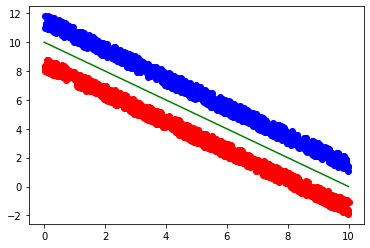

In [0]:
import matplotlib.pyplot as plt
import numpy as np
# 生成样本： label=0
x_pos = np.random.uniform(low=0, high=10, size=1000)
noise = np.random.uniform(low=1, high=2, size=1000)
y_pos = -1 * x_pos + 10 - noise 
label_pos = np.zeros(1000)

# 生成样本：label = 1
x_neg = np.random.uniform(low=0, high=10, size=1000)
noise = np.random.uniform(low=1, high=2, size=1000)
y_neg = -1 * x_neg + 10 + noise 
label_neg = np.ones(1000)

# 画出分割面 x+y-10 = 0
x_line = [0, 10]
y_line = [10, 0]
# 样本可视化
plt.scatter(x_pos, y_pos, color='r')
plt.scatter(x_neg, y_neg, color='b')
plt.plot(x_line, y_line, color='g')
plt.show()

In [0]:
# 组成矩阵

x_train = np.hstack([x_pos, x_neg])
y_train = np.hstack([y_pos, y_neg])
train_set = np.vstack([x_train, y_train])
train_set = train_set.T 

train_label = np.hstack([label_pos, label_neg])

print('train_set.shape = ', train_set.shape)
print(train_set)
print('\n')
print('train_label.shape = ', train_label.shape)
print(train_label)

train_set.shape =  (2000, 2)
[[ 9.2492767  -1.1209412 ]
 [ 4.92110021  3.78759163]
 [ 9.44979474 -0.62584199]
 ...
 [ 8.36367289  2.87326865]
 [ 0.39083746 10.86384592]
 [ 0.36876775 11.07609232]]


train_label.shape =  (2000,)
[0. 0. 0. ... 1. 1. 1.]


In [0]:
# 将数据转换成 tensor
import torch

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

train_data_pytorch = torch.from_numpy(train_set).float().to(device)
train_label_pytorch = torch.from_numpy(train_label).to(torch.long).to(device)
 
print(train_data_pytorch)
print(train_label_pytorch)


cuda:0
tensor([[ 9.2493, -1.1209],
        [ 4.9211,  3.7876],
        [ 9.4498, -0.6258],
        ...,
        [ 8.3637,  2.8733],
        [ 0.3908, 10.8638],
        [ 0.3688, 11.0761]], device='cuda:0')
tensor([0, 0, 0,  ..., 1, 1, 1], device='cuda:0')


In [0]:
# 构建神经网络模型
import torch.nn as nn 
from torch.nn import functional as F

class SimpleNet(nn.Module):
  def __init__(self, D_in, Hidden, D_out):
    super(SimpleNet, self).__init__()
    self.linear_1 = nn.Linear(D_in, Hidden)
    self.linear_2 = nn.Linear(Hidden, D_out)
  
  def forward(self, x):
    x = F.sigmoid(self.linear_1(x))
    x = self.linear_2(x)
    return x

In [0]:
## 训练模型

import torch.optim as optim 

model = SimpleNet(2, 2, 2).to(device)

def main():
  criterion = nn.CrossEntropyLoss()
  lr = 0.1 # learning rate
  optimizer = optim.SGD(model.parameters(), lr=lr)
  epoch_num = 2500

  for ep in range(epoch_num):
    # train
    model.train()
    output = model(train_data_pytorch)
    loss = criterion(output, train_label_pytorch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 每100次迭代输出训练集上的分类结果
    if (ep+1)%100 == 0:
      model.eval()
      p_out = model(train_data_pytorch)
      predict_labels = torch.argmax(p_out, 1).cpu().numpy()
      acc = np.sum(predict_labels == train_label) / 2000
      print('epoch num : {} -- Loss : {} -- Acc : {}'.format(ep+1,loss.data, acc))


main()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch num : 100 -- Loss : 0.640455424785614 -- Acc : 0.6435
epoch num : 200 -- Loss : 0.6247225999832153 -- Acc : 0.6475
epoch num : 300 -- Loss : 0.6116660237312317 -- Acc : 0.658
epoch num : 400 -- Loss : 0.5950497984886169 -- Acc : 0.6805
epoch num : 500 -- Loss : 0.5712347030639648 -- Acc : 0.7255
epoch num : 600 -- Loss : 0.5388244986534119 -- Acc : 0.7875
epoch num : 700 -- Loss : 0.4964624345302582 -- Acc : 0.872
epoch num : 800 -- Loss : 0.4448252022266388 -- Acc : 0.946
epoch num : 900 -- Loss : 0.3872624933719635 -- Acc : 0.9895
epoch num : 1000 -- Loss : 0.4121142625808716 -- Acc : 0.8635
epoch num : 1100 -- Loss : 0.3885829746723175 -- Acc : 0.8715
epoch num : 1200 -- Loss : 0.3663039803504944 -- Acc : 0.8865
epoch num : 1300 -- Loss : 0.3373892903327942 -- Acc : 0.911
epoch num : 1400 -- Loss : 0.29707425832748413 -- Acc : 0.9425
epoch num : 1500 -- Loss : 0.15609543025493622 -- Acc : 1.0
epoch num : 1600 -- Loss : 0.12400001287460327 -- Acc : 1.0
epoch num : 1700 -- Loss 

In [0]:
# 生成一些新的测试点进行测试
test_points = torch.tensor([[1,1],[4,7],[11,3],[-1,9],[0,7],[20,0]]).float().cuda() # 0, 1, 1, 0, 0, 1
model.eval()
test_output = model(test_points)
print(test_output)
print('\n')
print(torch.argmax(test_output, 1))
print('\n')

tensor([[ 3.2735, -2.2306],
        [-0.7739,  1.7411],
        [-2.0802,  3.0279],
        [ 2.3121, -1.2987],
        [ 2.9441, -1.9211],
        [-2.2686,  3.2134]], device='cuda:0', grad_fn=<AddmmBackward>)


tensor([0, 1, 1, 0, 0, 1], device='cuda:0')




/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
